In [4]:
import numpy as np          
import pandas as pd
import matplotlib.pyplot as plt                   
import seaborn as sns   


In [7]:
df=pd.read_csv('Churn_Modelling.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7297,7298,15637891,Docherty,613,Germany,Female,43,4,140681.68,1,0,1,20134.07,0
5889,5890,15708650,Fullwood,727,France,Female,31,2,52192.08,2,0,1,160383.47,0
9901,9902,15802909,Hu,706,Germany,Female,56,3,139603.22,1,1,1,86383.61,0
7066,7067,15680643,Lo,729,Spain,Female,42,1,0.00,2,1,1,149535.97,0
7464,7465,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1
7324,7325,15810723,Sanderson,607,France,Female,39,10,0.00,3,1,0,132741.13,1
2470,2471,15720838,Gallo,689,Spain,Female,31,3,139799.63,1,0,1,120663.57,0
1401,1402,15619029,Bykov,620,Spain,Female,43,2,0.00,2,1,0,20670.10,0
1606,1607,15714080,Goliwe,566,Germany,Female,40,2,97001.36,2,1,0,154486.01,0
6338,6339,15784161,Hargreaves,583,Germany,Male,39,8,102945.01,1,0,0,52861.89,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [16]:
df=pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [18]:
df = df.astype({col: int for col in df.select_dtypes(include=bool).columns})


In [19]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
y=df['Exited']
x=df.drop(columns=['Exited'])

In [23]:
x.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
x_train.shape

(8000, 11)

In [28]:
# scaling

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_train_scaled= scalar.fit_transform(x_train)
x_test_scaled= scalar.fit_transform(x_test)

In [30]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 1.3/376.0 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 2.1/376.0 MB 4.7 MB/s eta 0:01:20
   ---------------------------------------- 3.1/376.0 MB 4.2 MB/s eta 0:01:29
   ---------------------------------------- 3.7/376.0 MB 3.9 MB/s eta 0:01:36
   ---------------------------------------- 4.5/376.0 MB 3.7 MB/s eta 0:01:40
    --------------------------------------- 5.0/376.0 MB 3.7 MB/s eta 0:01:41
    --------------------------------------- 5.8/376.0 MB 3.6 MB/s eta 0:01:44
    --------------------------------------- 6.3/376.0 MB 3.6 MB/s eta 0:01:44
    --------------------------------------- 7.1/376.0 MB 3.5 MB/s eta 0:01:45
    --------------------------------------- 7.6/376.0 MB 3.5 MB/s eta 0:01:46
    --------------------------------------- 8.4/376.0 MB 3.5 MB/s eta 0

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [44]:
model= Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Ferdous\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [58]:
history=model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3359 - val_accuracy: 0.8487 - val_loss: 0.3467
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3351 - val_accuracy: 0.8600 - val_loss: 0.3471
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3347 - val_accuracy: 0.8562 - val_loss: 0.3454
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3342 - val_accuracy: 0.8594 - val_loss: 0.3465
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3340 - val_accuracy: 0.8556 - val_loss: 0.3474
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3335 - val_accuracy: 0.8600 - val_loss: 0.3467
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3331 - val_accuracy: 0.8587 - val_loss: 0.3470
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3323 - val_accu

In [59]:
model.layers[0].get_weights()

[array([[ 0.13125826, -0.06312757,  0.02480801,  0.08943037,  0.15314303,
          0.08839626,  0.1703296 ,  0.35080403,  0.23283038, -0.32800844,
         -0.14133115],
        [-0.4734659 , -0.0125975 , -0.28934535, -0.5140135 ,  0.6925098 ,
          1.0451425 , -0.15946926, -0.33566666,  0.2953378 , -0.00620499,
          0.6643343 ],
        [ 0.14143439, -0.1571642 , -0.18992236, -0.15269262,  0.03801293,
          0.19546954,  0.0484376 ,  0.37820068,  0.16244625, -0.2506224 ,
         -0.27533272],
        [ 0.96306276, -0.61123806, -0.18573862,  0.11975238,  0.26384848,
         -0.3597824 , -0.606169  ,  0.12334873,  0.21214513,  0.3775994 ,
          0.37341502],
        [-0.43860367, -0.9204899 ,  0.22252655,  0.37965968, -0.94719833,
         -0.18849912, -0.09524003,  0.9067497 , -0.30846015,  0.02949879,
          1.0270655 ],
        [ 0.76495546, -0.05469215, -0.35572243, -0.14480266, -0.01412032,
          0.01871476,  0.25201562,  0.064004  , -0.5399915 ,  0.3194248

In [60]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


In [61]:
y_pred=np.where(y_log>0.5, 1,0)

In [52]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred)

0.8605

In [55]:
history.history

{'accuracy': [0.8592187762260437,
  0.8607812523841858,
  0.8600000143051147,
  0.8603125214576721,
  0.8606250286102295,
  0.8614062666893005,
  0.8604687452316284,
  0.8610937595367432,
  0.8609374761581421,
  0.8614062666893005],
 'loss': [0.34771978855133057,
  0.3448011875152588,
  0.3438156843185425,
  0.3421385884284973,
  0.34081196784973145,
  0.33930864930152893,
  0.33836615085601807,
  0.3370434641838074,
  0.3375648856163025,
  0.3364112377166748],
 'val_accuracy': [0.8600000143051147,
  0.8612499833106995,
  0.8600000143051147,
  0.8518750071525574,
  0.8525000214576721,
  0.8481249809265137,
  0.8556249737739563,
  0.8600000143051147,
  0.8575000166893005,
  0.8525000214576721],
 'val_loss': [0.3538309335708618,
  0.35158073902130127,
  0.3506665825843811,
  0.3504686653614044,
  0.34884631633758545,
  0.3498409688472748,
  0.34814906120300293,
  0.35113561153411865,
  0.3469904363155365,
  0.34828242659568787]}

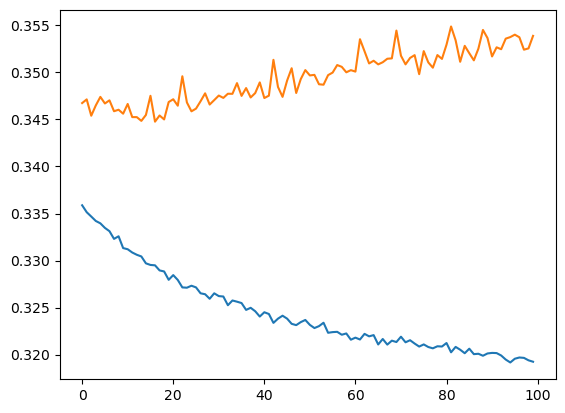

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

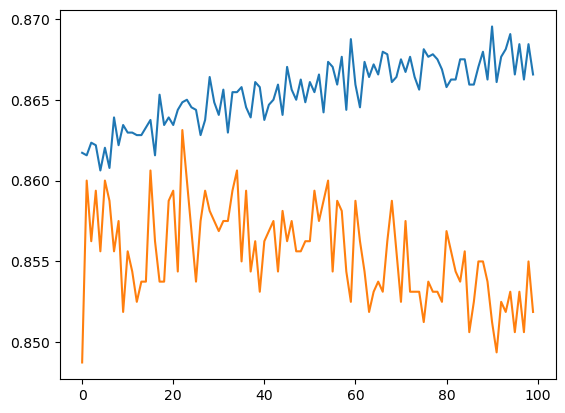

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])